# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2022
## Домашнее задание 4. Доверительные интервалы
### Дедлайн --- 1 декабря

Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается **в 10 баллов**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps

from tqdm.notebook import tqdm
from typing import Callable

sns.set(font_scale=1.4, style='whitegrid', palette='Set2')

## Задача 1

Сгенерируйте выборку $X_1, ...,X_{100}$ из распределения $P_\theta$.

Для уровня доверия $\alpha = 0.95$ для всех $n \leq 100$
изобразите на графиках в координатах $(n, \theta)$
* Доверительный интервал оценки $\widehat{\theta}$
* График оценки $\widehat{\theta}$
* Точки выборки

Для отрисовки доверительного интервала используйте `plt.fill_between`. Не забывайте про параметр `alpha`.

Для того, чтобы избежать дублирования кода, рекомендуем написать функцию `draw_confidence_interval`, изображающую на графике все необходимое.

In [2]:
N = 100
alpha = 0.95
theta = 10
lambd = 3

Выполните задание для следующих $P_\theta$ и $\widehat{\theta}$ (формулы доверительных итервалов были получены на семинарах):

### 1. Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$

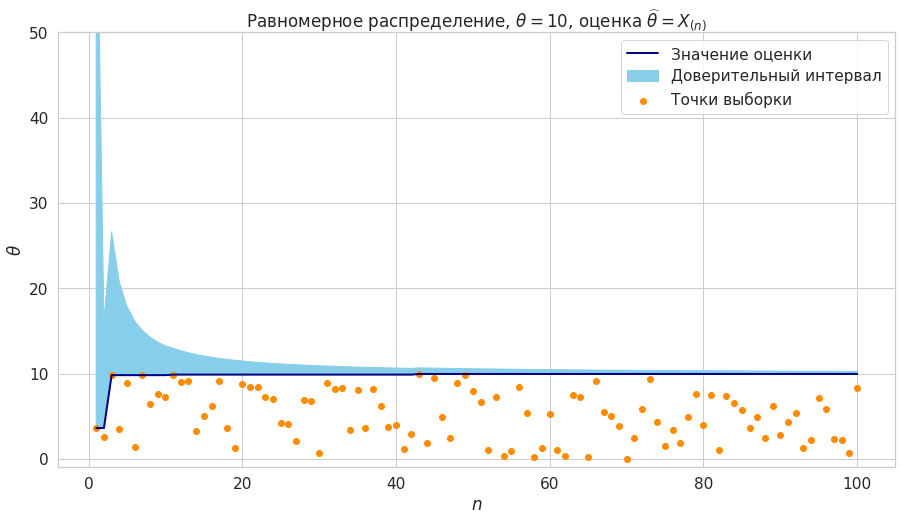

In [3]:
uni_sample = sps.uniform.rvs(size=N, scale=theta)

lower_bound = [max(uni_sample[:i]) for i in range(1, N + 1)]
upper_bound = [max(uni_sample[:i]) / (pow(1.0 - alpha, 1.0 / i)) for i in range(1, N + 1)]

linspace = np.arange(1, N + 1)
plt.figure(figsize=(15, 8))
plt.fill_between(linspace, lower_bound, upper_bound, label='Доверительный интервал', color='skyblue')
plt.scatter(linspace, uni_sample, label='Точки выборки', color='darkorange')
plt.plot(linspace, lower_bound, lw=2, label='Значение оценки', color='navy')
plt.title(r'Равномерное распределение, $\theta = 10$, оценка $\widehat{\theta} = X_{(n)}$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\theta$')
plt.ylim(-1, theta * 5)
plt.legend()
plt.show()

### 2. Распределение Коши, $\theta = 10$, оценка — медиана

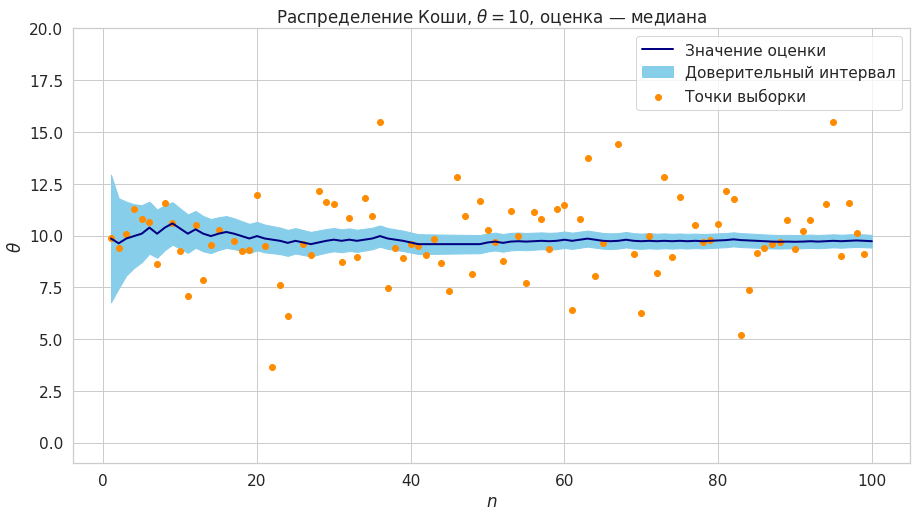

In [4]:
cau_sample = sps.cauchy.rvs(size=N, loc=theta)

lower_bound = [np.median(cau_sample[:i]) - (sps.norm.ppf((1 + alpha) / 2) * (np.pi / (2 * np.sqrt(i)))) for i in
               range(1, N + 1)]
upper_bound = [np.median(cau_sample[:i]) + (sps.norm.ppf((1 + alpha) / 2) * (np.pi / (2 * np.sqrt(i)))) for i in
               range(1, N + 1)]
est = [np.median(cau_sample[:i]) for i in range(1, N + 1)]
linspace = np.arange(1, N + 1)
plt.figure(figsize=(15, 8))
plt.fill_between(linspace, lower_bound, upper_bound, label='Доверительный интервал', color='skyblue')
plt.scatter(linspace, cau_sample, label='Точки выборки', color='darkorange')
plt.plot(linspace, est, lw=2, label='Значение оценки', color='navy')
plt.title(r'Распределение Коши, $\theta = 10$, оценка — медиана')
plt.xlabel(r'$n$')
plt.ylabel(r'$\theta$')
plt.ylim(-1, theta * 2)
plt.legend()
plt.show()

### 3. Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$

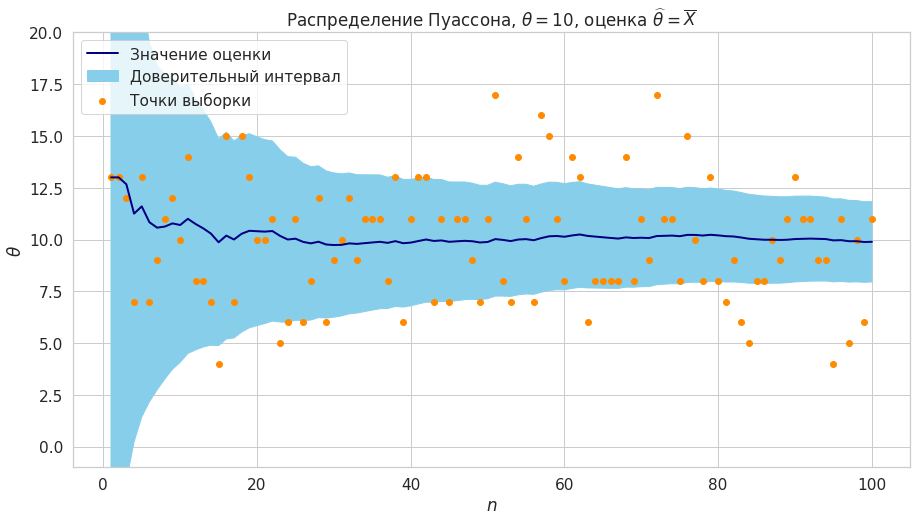

In [5]:
pois_sample = sps.poisson.rvs(size=N, mu=theta)

lower_bound = [np.mean(pois_sample[:i]) * (1 - (sps.norm.ppf((1 + alpha) * 0.5) / (np.sqrt(i)))) for i in
               range(1, N + 1)]
upper_bound = [np.mean(pois_sample[:i]) * (1 + (sps.norm.ppf((1 + alpha) * 0.5) / (np.sqrt(i)))) for i in
               range(1, N + 1)]
est = [np.mean(pois_sample[:i]) for i in range(1, N + 1)]
linspace = np.arange(1, N + 1)
plt.figure(figsize=(15, 8))
plt.fill_between(linspace, lower_bound, upper_bound, label='Доверительный интервал', color='skyblue')
plt.scatter(linspace, pois_sample, label='Точки выборки', color='darkorange')
plt.plot(linspace, est, lw=2, label='Значение оценки', color='navy')
plt.title(r'Распределение Пуассона, $\theta = 10$, оценка $\widehat{\theta} = \overline{X}$')
plt.xlabel(r'$n$')
plt.ylabel(r'$\theta$')
plt.ylim(-1, theta * 2)
plt.legend()
plt.show()

### 4. Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна

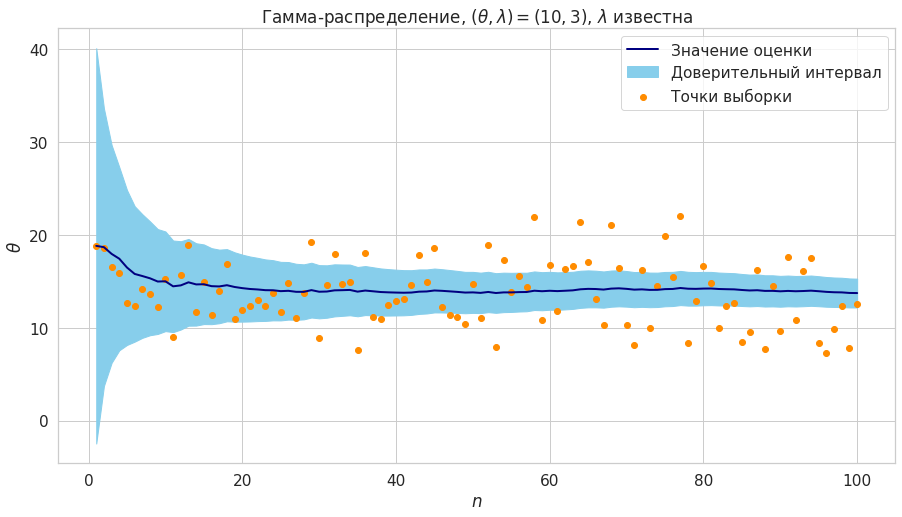

In [6]:
gam_sample = sps.gamma.rvs(theta, lambd, size=N)

lower_bound = [np.mean(gam_sample[:i]) * (1 - (sps.norm.ppf((1 + alpha) * 0.5) / np.sqrt(lambd * i))) for i in
               range(1, N + 1)]
upper_bound = [np.mean(gam_sample[:i]) * (1 + (sps.norm.ppf((1 + alpha) * 0.5) / np.sqrt(lambd * i))) for i in
               range(1, N + 1)]
est = [np.mean(gam_sample[:i]) for i in range(1, N + 1)]
linspace = np.arange(1, N + 1)
plt.figure(figsize=(15, 8))
plt.fill_between(linspace, lower_bound, upper_bound, label='Доверительный интервал', color='skyblue')
plt.scatter(linspace, gam_sample, label='Точки выборки', color='darkorange')
plt.plot(linspace, est, lw=2, label='Значение оценки', color='navy')
plt.title(r'Гамма-распределение, $(\theta, \lambda) = (10, 3)$, $\lambda$ известна')
plt.xlabel(r'$n$')
plt.ylabel(r'$\theta$')
plt.legend()
plt.show()

Сделайте выводы о размерах и форме доверительных интервалов для каждого случая.

__Вывод__
1. Интервал сходится к истинному значению во всех случаях
2. Быстрее всего в случае первой статистики мы наблюдаем сходимость
3. У распределения Пуассона один из самых широких интервалов, второй по этому показателю -- итервал гамма распределения, что определяется логически из формул, которые были получены на семинарах

# Задача 2

Для $n = 100$ оцените для кажого пункта предыдущей задачи вероятность попадания истинного значения
$\theta$ в интервал. Для этого нужно сделать слудующее:
1. Сгенерируйте достаточно много выборок из $P_{\theta}$
2. Постройте по каждой из них интервалы для $\widehat{\theta}$
3. Определите, сколько раз истинное значение $\theta.$ попадает в построенные интервалы. Таким способом будет
построена бернуллиевская выборка, по ней оцените вероятность.

Предположите, какое количество выборок нужно взять. Обоснуйте свой выбор.

__Ответ:__
В результате различных генераций оказалось, что на значениях в районе 200 значения сходятся.

In [7]:
num_of_samples = 200

### Равномерное распределение

In [8]:
uni_sample = sps.uniform.rvs(size=(N, num_of_samples), scale=theta)
lower_bound = [max(uni_sample[:, j]) for j in range(0, num_of_samples)]
upper_bound = [max(uni_sample[:, j]) / (pow(1.0 - alpha, 1.0 / N)) for j in
               range(0, num_of_samples)]
is_in_bounds = [1 if lower_bound[j] <= theta <= upper_bound[j] else 0 for j in
                range(0, num_of_samples)]
print(np.mean(is_in_bounds))

0.97


### Распределение Коши

In [9]:
cau_sample = sps.cauchy.rvs(size=(N, num_of_samples), loc=theta)

lower_bound = [np.median(cau_sample[:, j]) - (sps.norm.ppf((1 + alpha) / 2) * (np.pi / (2 * np.sqrt(N)))) for j in
               range(0, num_of_samples)]
upper_bound = [np.median(cau_sample[:, j]) + (sps.norm.ppf((1 + alpha) / 2) * (np.pi / (2 * np.sqrt(N)))) for j in
               range(0, num_of_samples)]
is_in_bounds = [1 if lower_bound[j] <= theta <= upper_bound[j] else 0 for j in
                range(0, num_of_samples)]
print(np.mean(is_in_bounds))

0.98


### Распределение Пуассона

In [10]:
pois_sample = sps.poisson.rvs(size=(N, num_of_samples), mu=theta)
lower_bound = [np.mean(pois_sample[:, j]) * (1 - (sps.norm.ppf((1 + alpha) * 0.5) / (np.sqrt(N)))) for j in
               range(0, num_of_samples)]
upper_bound = [np.mean(pois_sample[:, j]) * (1 + (sps.norm.ppf((1 + alpha) * 0.5) / (np.sqrt(N)))) for j in
               range(0, num_of_samples)]
is_in_bounds = [1 if lower_bound[j] <= theta <= upper_bound[j] else 0 for j in
                range(0, num_of_samples)]
print(np.mean(is_in_bounds))

1.0


### Гамма-распределение

In [11]:
gam_sample = sps.gamma.rvs(theta, lambd, size=(N, num_of_samples))

lower_bound = [np.mean(gam_sample[:, j]) * (1 - (sps.norm.ppf((1 + alpha) * 0.5) / np.sqrt(lambd * N))) for j in
               range(0, num_of_samples)]
upper_bound = [np.mean(gam_sample[:, j]) * (1 + (sps.norm.ppf((1 + alpha) * 0.5) / np.sqrt(lambd * N))) for j in
               range(0, num_of_samples)]
is_in_bounds = [1 if lower_bound[j] <= theta <= upper_bound[j] else 0 for j in
                range(0, num_of_samples)]
print(np.mean(is_in_bounds))

0.0


Сделайте выводы.
__Вывод__
Хуже всего в интервал попадают элементы выборки гамма-распределения, для всех остальных распределений интервалы являются хорошими, т.е. неплохо оценивают разброс значений.

# Задача 3

В этой задаче мы построим точный и асимптотический доверительный интевалы для нормального распределения и сравним их.

Пусть $X_1, \dots, X_n$ — выборка из нормального распределения со средним $a$ и дисперсией $\sigma^2$, причем $\sigma$ неизвестна. Выпишите формулы

* точного доверительного итервала уровня доверия $\alpha$ для $a$:

* асимптотического доверительного итервала уровня доверия $\alpha$ для $a$


Для $n=30, \,a = 0$ постройте __на одном графике__ точный и асимптотический доверительный интервал, а также отметьте линией истинное значение $a$

Асимптотический интервал:
$$a \in (\overline{X} - \frac{z_{(\alpha+1)/2} \sigma}{\sqrt{N}}, \overline{X} + \frac{z_{(\alpha+1)/2} \sigma}{\sqrt{N}})$$
Квантили нормального распределения
Точный асимптотический:
$$a \in (\overline{X} - \frac{z_{({\alpha}+1)/2} \sigma}{\sqrt{N}}, \overline{X} + \frac{z_{({\alpha}+1)/2} \sigma}{\sqrt{N}})$$
Квантили Стьюдента

In [12]:
def calculate_conf_interval(
        sample: np.ndarray,
        alpha: float = 0.95
):
    """Вычисление точного доверительного интервала уровня доверия alpha. """
    mean = np.mean(sample)
    delta = np.var(sample) * sps.norm.ppf((1 + alpha) * 0.5) / np.sqrt(len(sample))
    return mean, mean + delta, mean - delta

In [13]:
def calculate_asymptotic_conf_interval(
        sample: np.ndarray,
        alpha: float = 0.95
):
    """Вычисление асимптотического доверительного интервала уровня доверия alpha. """
    mean = np.mean(sample)
    delta = np.var(sample) * sps.t.ppf((((1 + alpha) * 0.5) / np.sqrt(len(sample))), len(sample) - 1)
    return mean, mean + delta, mean - delta

In [14]:
N = 30
norm_distr = sps.norm.rvs(loc=0,size=N)

as_mean = []
conf_mean = []
as_lower = []
as_upper = []
conf_lower = []
conf_upper = []

for i in range(1, N + 1):
    mean, up, low = calculate_conf_interval(norm_distr[:i])
    conf_mean.append(mean)
    conf_lower.append(low)
    conf_upper.append(up)
    mean, up, low = calculate_asymptotic_conf_interval(norm_distr[:i])
    as_mean.append(mean)
    as_lower.append(low)
    as_upper.append(up)

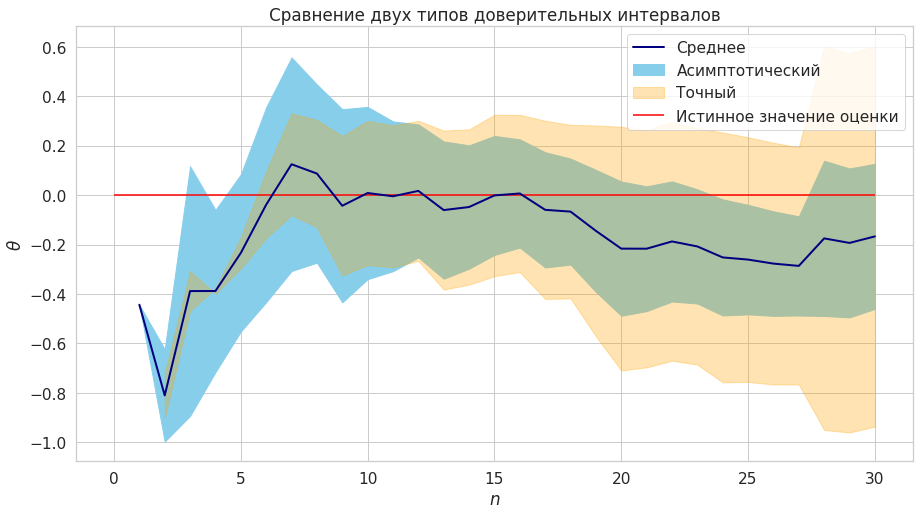

In [15]:
linspace = np.arange(1, N + 1)
plt.figure(figsize=(15, 8))
plt.fill_between(linspace, conf_lower, conf_upper, label='Асимптотический', color='skyblue')
plt.fill_between(linspace, as_lower, as_upper, label='Точный', color='orange', alpha=0.3)
plt.plot(linspace, conf_mean, lw=2, label='Среднее', color='navy')
plt.hlines(0, 0, N, label='Истинное значение оценки', color='red')

plt.title(r'Сравнение двух типов доверительных интервалов')
plt.xlabel(r'$n$')
plt.ylabel(r'$\theta$')
plt.legend()
plt.show()

Сделайте выводы. В каких случаях уместно использовать асимптотический интервал вместо точного?

__Вывод__
Различные генерации показали, что уместно использовать при небольших $n \le 13$.

# Задача 4

В этой задаче мы проанализируем изменение индекса качества воздуха (air quality index, AQI) для двух мегаполисов Индии за последние годы. Данные взяты с Kaggle (https://www.kaggle.com/rohanrao/air-quality-data-in-india)

In [16]:
!gdown 1DE7zVPsfSk8hyEdWRf4WPr3I0w5GUOpp

Downloading...
From: https://drive.google.com/uc?id=1DE7zVPsfSk8hyEdWRf4WPr3I0w5GUOpp
To: /home/ksenia/MiptStats/city_day.csv
100%|██████████████████████████████████████| 2.57M/2.57M [00:00<00:00, 11.6MB/s]


Загрузите файл `city_day.csv`. Нам понадобятся столбцы `City`, `Date` и `AQI`. При этом учтите, что:
* В дальнейшем мы будем работать с датами, поэтому используйте аргумент `parse_dates` чтобы корректо их распарсить
* Данные содержат пропуски, которые нужно удалить

In [17]:
import pandas as pd

data = pd.read_csv("city_day.csv", parse_dates=['Date'])
data = data[['City', 'Date', 'AQI']]
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24850 entries, 28 to 29530
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   City    24850 non-null  object        
 1   Date    24850 non-null  datetime64[ns]
 2   AQI     24850 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 776.6+ KB


Для удобства сохраните в отдельные поля `Month` и `Year` соответственно год и месяц, когда производились замеры

In [18]:
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

Нас будут интересовать два города: Мумбаи (Mumbai) и Калькутта (Kolkata). Сохраните данные по этим двум городам для всех днней с 1 июля 2018 года включительно

In [19]:
target_date = pd.to_datetime('2018-07-01')
mumbai = data.loc[(data['City'] == 'Mumbai') & (data['Date'] > target_date)]
kolkata = data.loc[(data['City'] == 'Kolkata') & (data['Date'] > target_date)]

В предыдущих задачах мы строили доверительные интервалы в предположении, что выборка взята из параметрического семейства распределений. Но что делать в случае, когда подобное предположение сделать нельзя? Оказывается, в этом случае можно строить доверительный интервал с помощью бутстрепа.

Пусть $X_1, \dots, X_n$ — выборка, для которой мы хотим оценить некоторую величину $\theta$. Построим $k$ бутстепных выборок, и получим по ним оценки $\theta^*_1, \dots, \theta^*_k$. Отсортируем их, чтобы получить вариационный ряд $\theta^*_{(1)}, \dots, \theta^*_{(k)}$. Тогда получим, что
$$
C^* = \left(\theta^*_{(\lfloor k (1 + \alpha) / 2 \rfloor)},
\theta^*_{(\lceil k (1 - \alpha) / 2 \rceil)} \right)
$$
будет (приблизительным) доверительным интервалом для $\theta$ уровня доверия $\alpha$.

Для каждого месяца с июля 2018 по июнь 2020 включтельно постройте бутстрепный доверительный интервал для __среднего значения AQI__. В этом вам помогут следующие вспомогательные функции:

In [20]:
def get_dataset_by_month(
        df: pd.DataFrame,
        year: int,
        month: int
):
    """ Сохранение в массив данные для указанного месяца и года."""
    return df.loc[(df['Date'].dt.month == month) & (df['Date'].dt.year == year)]

In [21]:
def get_bootstrap_samples(
        sample: np.ndarray,
        k: int = 1000
):
    """ Построение k бутстрепных выборок для указанной выборки. """
    return np.random.choice(sample, size=(k, k))

In [22]:
def bootstrap_conf_interval(
        sample: np.ndarray,
        estimator: Callable = lambda x: np.mean(x, axis=-1),
        alpha: float = 0.95,
):
    """ Построение бутстрепных доверительных интервалов. """
    k = len(sample)
    thetas = []
    for i in range(0, k):
        thetas.append(estimator(sample[i]))
    sorted_sample = sorted(thetas)
    return sorted_sample[int(k * (1 - alpha) / 2)], sorted_sample[int(k * (1 + alpha) / 2)]

In [23]:
# убираем всё до июня 2020
target_date = pd.to_datetime('2018-07-01')
target_date2 = pd.to_datetime('2020-06-30')
tmp_mumbai = data.loc[(data['City'] == 'Mumbai') &
                      (data['Date'] > target_date) &
                      (data['Date'] < target_date2)]
tmp_kolkata = data.loc[(data['City'] == 'Kolkata') &
                       (data['Date'] > target_date) &
                       (data['Date'] < target_date2)]

In [24]:
mumbai_lower = []
mumbai_upper = []

kolkata_lower = []
kolkata_upper = []

mumbai_mean = []
kolkata_mean = []

mumbai_dates = []
kolkata_dates = []

for year in [2018, 2019, 2020]:
    for month in range(1, 13):
        data_mumbai = get_dataset_by_month(tmp_mumbai, year, month)
        data_kolkata = get_dataset_by_month(tmp_kolkata, year, month)
        if len(data_mumbai['AQI']) > 0:
            bootstap_mumbai = get_bootstrap_samples(data_mumbai['AQI'])

            l, u = bootstrap_conf_interval(bootstap_mumbai)
            mumbai_lower.append(l)
            mumbai_upper.append(u)

            mumbai_mean.append(np.mean(data_mumbai['AQI']))
            mumbai_dates.append('{0}-{1}'.format(year, month))
        if len(data_kolkata['AQI']) > 0:
            bootstap_kolkata = get_bootstrap_samples(data_kolkata['AQI'])

            l, u = bootstrap_conf_interval(bootstap_kolkata)
            kolkata_lower.append(l)
            kolkata_upper.append(u)

            kolkata_mean.append(np.mean(data_kolkata['AQI']))
            kolkata_dates.append('{0}-{1}'.format(year, month))

Постройте на одном графике доверительные интервалы для Мумбаи и Калькутты. Также отметьте точками на графике истинный средний AQI и соедините точки линиями. Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

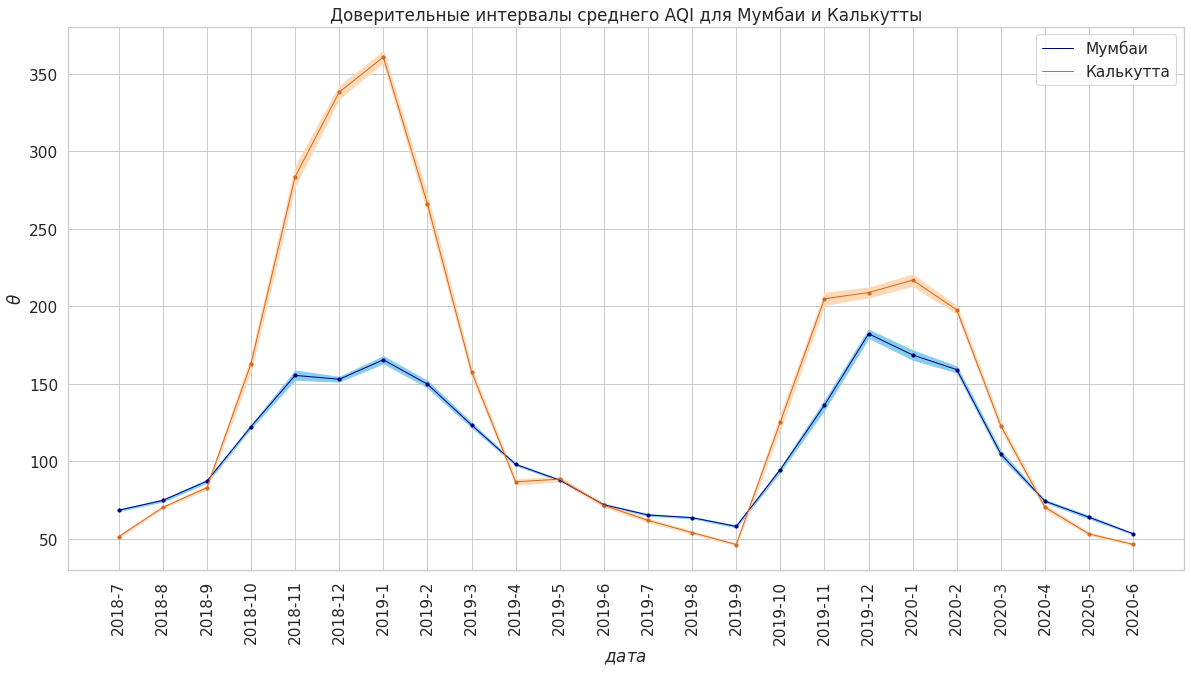

In [25]:
plt.figure(figsize=(20, 10))
plt.fill_between(mumbai_dates, mumbai_lower, mumbai_upper, color='skyblue')
plt.fill_between(kolkata_dates, kolkata_lower, kolkata_upper, color='peachpuff')
plt.scatter(mumbai_dates, mumbai_mean, s=10, color='navy')
plt.scatter(kolkata_dates, kolkata_mean, s=10, color='chocolate')
plt.plot(mumbai_dates, mumbai_mean, lw=1, label='Мумбаи', color='navy')
plt.plot(kolkata_dates, kolkata_mean, lw=1, label='Калькутта', color='chocolate')
plt.title(r'Доверительные интервалы среднего AQI для Мумбаи и Калькутты')
plt.xlabel(r'$дата$')
plt.ylabel(r'$\theta$')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Посмотрите на получившийся график. Видны ли в нем какие-либо закономерности? С чем они могут быть связаны?

__Вывод__
Заметим, что по всем городам дисперсия низкая, а значит, показатели стабильны внутри месяца. В обоих городах происходят скачки одновременно, это связано с географической близостью, в следствие чего их AQI коррелируют.

Теперь давайте сравним качество воздуха в апреле 2019 и апреле 2020 годов. Постройте __на одном графике__
* доверительные интервалы для апреля 2019 и апреля 2020 для Мумбаи
* истинные средние значения (с помощью `plt.hlines`)
* точки выборки

Проследите за тем, чтобы графики, относящиеся к одному городу, были одного цвета.

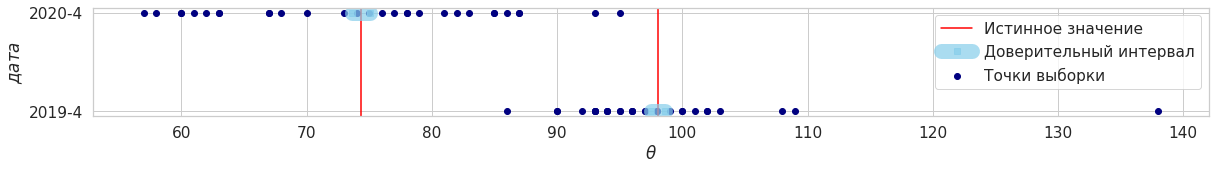

In [26]:
mumbai_dates = np.array(mumbai_dates)
i = np.where(mumbai_dates == '2020-4')[0][0]
j = np.where(mumbai_dates == '2019-4')[0][0]

plt.figure(figsize=(20, 2))
# 2019
tmp = get_dataset_by_month(tmp_mumbai, 2019, 4)['AQI']
plt.scatter(tmp, ['2019-4'] * len(tmp), color='navy', label='Точки выборки')
plt.axvline(np.mean(tmp), ymin=0, ymax=2, label='Истинное значение', color='red')
plt.plot([mumbai_lower[j], mumbai_upper[j]], ['2019-4'] * 2, lw=15, marker='s', alpha=0.71,
         label='Доверительный интервал', color='skyblue')

# 2020
tmp = get_dataset_by_month(tmp_mumbai, 2020, 4)['AQI']
plt.scatter(tmp, ['2020-4'] * len(tmp), color='navy')
plt.axvline(np.mean(tmp), ymin=0, ymax=2, color='red')
plt.plot([mumbai_lower[i], mumbai_upper[i]], ['2020-4'] * 2, lw=15, marker='s', alpha=0.71, color='skyblue')

plt.xlabel(r'$\theta$')
plt.ylabel(r'$дата$')
plt.legend()
plt.show()

Теперь проделайте то же самое для Калькутты

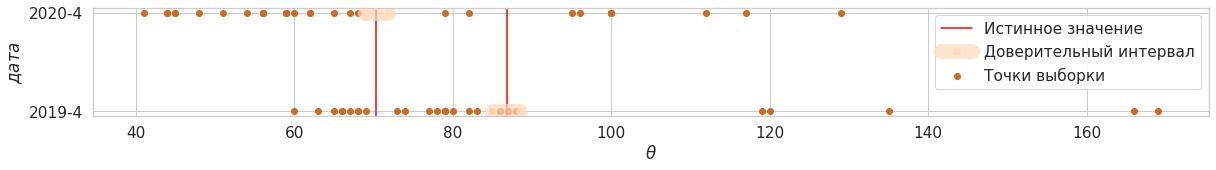

In [27]:
kolkata_dates = np.array(kolkata_dates)
i = np.where(kolkata_dates == '2020-4')[0][0]
j = np.where(kolkata_dates == '2019-4')[0][0]

plt.figure(figsize=(20, 2))
# 2019
tmp = get_dataset_by_month(tmp_kolkata, 2019, 4)['AQI']
plt.scatter(tmp, ['2019-4'] * len(tmp), color='chocolate')
plt.axvline(np.mean(tmp), ymin=0, ymax=2, label='Истинное значение', color='red')
plt.plot([kolkata_lower[j], kolkata_upper[j]], ['2019-4'] * 2, lw=15, marker='s', alpha=0.71,
         label='Доверительный интервал', color='peachpuff')

# 2020
tmp = get_dataset_by_month(tmp_kolkata, 2020, 4)['AQI']
plt.scatter(tmp, ['2020-4'] * len(tmp), color='chocolate', label='Точки выборки')
plt.axvline(np.mean(tmp), ymin=0, ymax=2, color='red')
plt.plot([kolkata_lower[i], kolkata_upper[i]], ['2020-4'] * 2, lw=15, marker='s', alpha=0.71, color='peachpuff')

plt.xlabel(r'$\theta$')
plt.ylabel(r'$дата$')
plt.legend()
plt.show()

Сделайте выводы. Что можно сказать про доверительные интервалы в каждом из случаев?

__Вывод__
Доверительный интервал в каждом из случае содержит среднюю оценку, но слишком мал для того, чтобы в него попала бОльшая часть точек выборки.